# Weather Enrichment - Add Weather Features to Parking Data

**Purpose:** Merge historical weather data with AMP and LPR parking datasets.

**Input Files:**
- `data/processed/amp_enriched.csv` - AMP parking sessions with calendar features
- `data/processed/lpr_enriched.csv` - LPR detections with calendar features
- `data/weather_pullman_2020_2025.csv` - Historical weather data

**Output Files:**
- `data/processed/amp_final.csv` - AMP data with calendar + weather features
- `data/processed/lpr_final.csv` - LPR data with calendar + weather features

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
print("Libraries loaded successfully")

Libraries loaded successfully


## Load Weather Data

In [2]:
# Load weather data
weather = pd.read_csv('../data/weather_pullman_2020_2025.csv')
weather['date'] = pd.to_datetime(weather['date'])

print(f"Loaded weather data: {len(weather):,} days")
print(f"Date range: {weather['date'].min().date()} to {weather['date'].max().date()}")
print(f"\nWeather columns ({len(weather.columns)}):")
print(weather.columns.tolist())
print(f"\nSample weather data:")
print(weather.head())

Loaded weather data: 2,131 days
Date range: 2020-01-01 to 2025-10-31

Weather columns (18):
['date', 'temp_max_f', 'temp_min_f', 'temp_mean_f', 'precipitation_inches', 'precipitation_hours', 'snowfall_inches', 'snow_depth_inches', 'wind_max_mph', 'weather_code', 'weather_category', 'is_rainy', 'is_snowy', 'is_cold', 'is_hot', 'is_windy', 'temp_range_f', 'is_severe']

Sample weather data:
        date  temp_max_f  temp_min_f  temp_mean_f  precipitation_inches  \
0 2020-01-01        45.1        37.1         41.9                 0.165   
1 2020-01-02        39.1        34.3         36.6                 0.169   
2 2020-01-03        50.0        37.0         43.7                 0.004   
3 2020-01-04        47.7        32.1         39.3                 0.043   
4 2020-01-05        40.7        32.7         35.3                 0.067   

   precipitation_hours  snowfall_inches  snow_depth_inches  wind_max_mph  \
0                  8.0            0.000              0.066          23.2   
1     

## Load AMP Enriched Data

In [3]:
# Load AMP enriched data
amp = pd.read_csv('../data/processed/amp_enriched.csv')
amp['Start_Date'] = pd.to_datetime(amp['Start_Date'])
amp['End_Date'] = pd.to_datetime(amp['End_Date'])

print(f"Loaded AMP data: {len(amp):,} parking sessions")
print(f"Date range: {amp['Start_Date'].min().date()} to {amp['End_Date'].max().date()}")
print(f"Current columns: {len(amp.columns)}")

Loaded AMP data: 1,702,867 parking sessions
Date range: 2020-08-10 to 2025-11-02
Current columns: 24


## Merge Weather with AMP Data

In [4]:
# Extract date from Start_Date for merging
amp['parking_date'] = amp['Start_Date'].dt.date
weather['merge_date'] = weather['date'].dt.date

# Merge on date
print("Merging weather data with AMP parking sessions...")
amp_weather = amp.merge(
    weather.drop('date', axis=1),  # Drop the datetime column, keep only date
    left_on='parking_date',
    right_on='merge_date',
    how='left'
)

# Drop temporary merge columns
amp_weather.drop(['parking_date', 'merge_date'], axis=1, inplace=True)

print(f"\nMerge complete!")
print(f"  Records: {len(amp_weather):,}")
print(f"  Columns: {len(amp_weather.columns)} (was {len(amp.columns)})")
print(f"  New weather columns added: {len(amp_weather.columns) - len(amp.columns)}")

# Check for missing weather data
missing_weather = amp_weather['temp_mean_f'].isna().sum()
if missing_weather > 0:
    print(f"\n⚠️  WARNING: {missing_weather:,} records missing weather data")
    print(f"  ({missing_weather/len(amp_weather)*100:.2f}% of total)")
else:
    print(f"\n✓ All records have weather data!")

Merging weather data with AMP parking sessions...

Merge complete!
  Records: 1,702,867
  Columns: 41 (was 25)
  New weather columns added: 16

✓ All records have weather data!


## Load LPR Enriched Data

In [5]:
# Load LPR enriched data
lpr = pd.read_csv('../data/processed/lpr_enriched.csv')
lpr['Date_Time'] = pd.to_datetime(lpr['Date_Time'])

print(f"Loaded LPR data: {len(lpr):,} detections")
print(f"Date range: {lpr['Date_Time'].min().date()} to {lpr['Date_Time'].max().date()}")
print(f"Current columns: {len(lpr.columns)}")

C:\Users\gudin\AppData\Local\Temp\ipykernel_38760\1741742285.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  lpr = pd.read_csv('../data/processed/lpr_enriched.csv')


Loaded LPR data: 1,810,155 detections
Date range: 2022-07-01 to 2025-06-30
Current columns: 26


## Merge Weather with LPR Data

In [6]:
# Extract date from Date_Time for merging
lpr['detection_date'] = lpr['Date_Time'].dt.date
weather['merge_date'] = weather['date'].dt.date

# Merge on date
print("Merging weather data with LPR detections...")
lpr_weather = lpr.merge(
    weather.drop('date', axis=1),
    left_on='detection_date',
    right_on='merge_date',
    how='left'
)

# Drop temporary merge columns
lpr_weather.drop(['detection_date', 'merge_date'], axis=1, inplace=True)

print(f"\nMerge complete!")
print(f"  Records: {len(lpr_weather):,}")
print(f"  Columns: {len(lpr_weather.columns)} (was {len(lpr.columns)})")
print(f"  New weather columns added: {len(lpr_weather.columns) - len(lpr.columns)}")

# Check for missing weather data
missing_weather = lpr_weather['temp_mean_f'].isna().sum()
if missing_weather > 0:
    print(f"\n⚠️  WARNING: {missing_weather:,} records missing weather data")
    print(f"  ({missing_weather/len(lpr_weather)*100:.2f}% of total)")
else:
    print(f"\n✓ All records have weather data!")

Merging weather data with LPR detections...

Merge complete!
  Records: 1,810,155
  Columns: 43 (was 27)
  New weather columns added: 16

✓ All records have weather data!


## Summary of Final Datasets

In [7]:
print("="*70)
print("FINAL ENRICHED DATASETS SUMMARY")
print("="*70)

print(f"\nAMP FINAL DATASET:")
print(f"  Records: {len(amp_weather):,}")
print(f"  Date range: {amp_weather['Start_Date'].min().date()} to {amp_weather['End_Date'].max().date()}")
print(f"  Total columns: {len(amp_weather.columns)}")
print(f"  Memory usage: {amp_weather.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\nLPR FINAL DATASET:")
print(f"  Records: {len(lpr_weather):,}")
print(f"  Date range: {lpr_weather['Date_Time'].min().date()} to {lpr_weather['Date_Time'].max().date()}")
print(f"  Total columns: {len(lpr_weather.columns)}")
print(f"  Memory usage: {lpr_weather.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n" + "="*70)
print("FEATURE CATEGORIES")
print("="*70)

# List all feature categories
temporal_features = ['year', 'month', 'day', 'hour', 'day_of_week', 'is_weekend', 'time_of_day', 'semester']
calendar_features = ['is_game_day', 'is_game_week', 'days_until_next_game', 'days_since_last_game',
                     'is_finals_week', 'is_spring_break', 'is_thanksgiving_break', 'is_winter_break',
                     'is_university_holiday', 'is_any_break']
weather_features = ['temp_max_f', 'temp_min_f', 'temp_mean_f', 'precipitation_inches', 'precipitation_hours',
                    'snowfall_inches', 'snow_depth_inches', 'wind_max_mph', 'weather_code', 'weather_category',
                    'is_rainy', 'is_snowy', 'is_cold', 'is_hot', 'is_windy', 'is_severe', 'temp_range_f']

print(f"\nTemporal Features ({len(temporal_features)}):")
for feat in temporal_features:
    print(f"  - {feat}")

print(f"\nCalendar/Event Features ({len(calendar_features)}):")
for feat in calendar_features:
    print(f"  - {feat}")

print(f"\nWeather Features ({len(weather_features)}):")
for feat in weather_features:
    print(f"  - {feat}")

FINAL ENRICHED DATASETS SUMMARY

AMP FINAL DATASET:
  Records: 1,702,867
  Date range: 2020-08-10 to 2025-11-02
  Total columns: 41
  Memory usage: 1011.7 MB

LPR FINAL DATASET:
  Records: 1,810,155
  Date range: 2022-07-01 to 2025-06-30
  Total columns: 43
  Memory usage: 1333.7 MB

FEATURE CATEGORIES

Temporal Features (8):
  - year
  - month
  - day
  - hour
  - day_of_week
  - is_weekend
  - time_of_day
  - semester

Calendar/Event Features (10):
  - is_game_day
  - is_game_week
  - days_until_next_game
  - days_since_last_game
  - is_finals_week
  - is_spring_break
  - is_thanksgiving_break
  - is_winter_break
  - is_university_holiday
  - is_any_break

Weather Features (17):
  - temp_max_f
  - temp_min_f
  - temp_mean_f
  - precipitation_inches
  - precipitation_hours
  - snowfall_inches
  - snow_depth_inches
  - wind_max_mph
  - weather_code
  - weather_category
  - is_rainy
  - is_snowy
  - is_cold
  - is_hot
  - is_windy
  - is_severe
  - temp_range_f


## Quick Weather Impact Analysis

In [8]:
# Analyze parking sessions by weather conditions
print("="*70)
print("WEATHER IMPACT ON PARKING - QUICK ANALYSIS")
print("="*70)

# AMP sessions by weather category
print(f"\nAMP Sessions by Weather Category:")
weather_counts = amp_weather.groupby('weather_category').size().sort_values(ascending=False)
for category, count in weather_counts.items():
    pct = count / len(amp_weather) * 100
    print(f"  {category:15s}: {count:>8,} ({pct:>5.2f}%)")

# Average sessions by weather conditions (fixed - recreate date column)
print(f"\nAverage Daily Sessions by Condition:")
amp_weather['date_only'] = amp_weather['Start_Date'].dt.date
for condition in ['is_rainy', 'is_snowy', 'is_cold', 'is_hot', 'is_severe']:
    avg_yes = amp_weather[amp_weather[condition] == 1].groupby('date_only').size().mean()
    avg_no = amp_weather[amp_weather[condition] == 0].groupby('date_only').size().mean()
    print(f"  {condition:15s}: Yes={avg_yes:.0f}, No={avg_no:.0f}")
amp_weather.drop('date_only', axis=1, inplace=True)

# LPR detections by weather category
print(f"\nLPR Detections by Weather Category:")
weather_counts_lpr = lpr_weather.groupby('weather_category').size().sort_values(ascending=False)
for category, count in weather_counts_lpr.items():
    pct = count / len(lpr_weather) * 100
    print(f"  {category:15s}: {count:>8,} ({pct:>5.2f}%)")

WEATHER IMPACT ON PARKING - QUICK ANALYSIS

AMP Sessions by Weather Category:
  Cloudy         :  729,955 (42.87%)
  Drizzle        :  379,374 (22.28%)
  Snow           :  323,676 (19.01%)
  Clear          :  143,610 ( 8.43%)
  Rain           :  126,252 ( 7.41%)

Average Daily Sessions by Condition:
  is_rainy       : Yes=964, No=894
  is_snowy       : Yes=989, No=895
  is_cold        : Yes=1034, No=891
  is_hot         : Yes=471, No=926
  is_severe      : Yes=752, No=912

LPR Detections by Weather Category:
  Cloudy         :  803,478 (44.39%)
  Drizzle        :  407,299 (22.50%)
  Snow           :  320,143 (17.69%)
  Clear          :  141,610 ( 7.82%)
  Rain           :  137,625 ( 7.60%)


## Visualize Weather Impact

C:\Users\gudin\AppData\Local\Temp\ipykernel_38760\1603841548.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_counts = amp_weather.groupby('temp_bin').size()


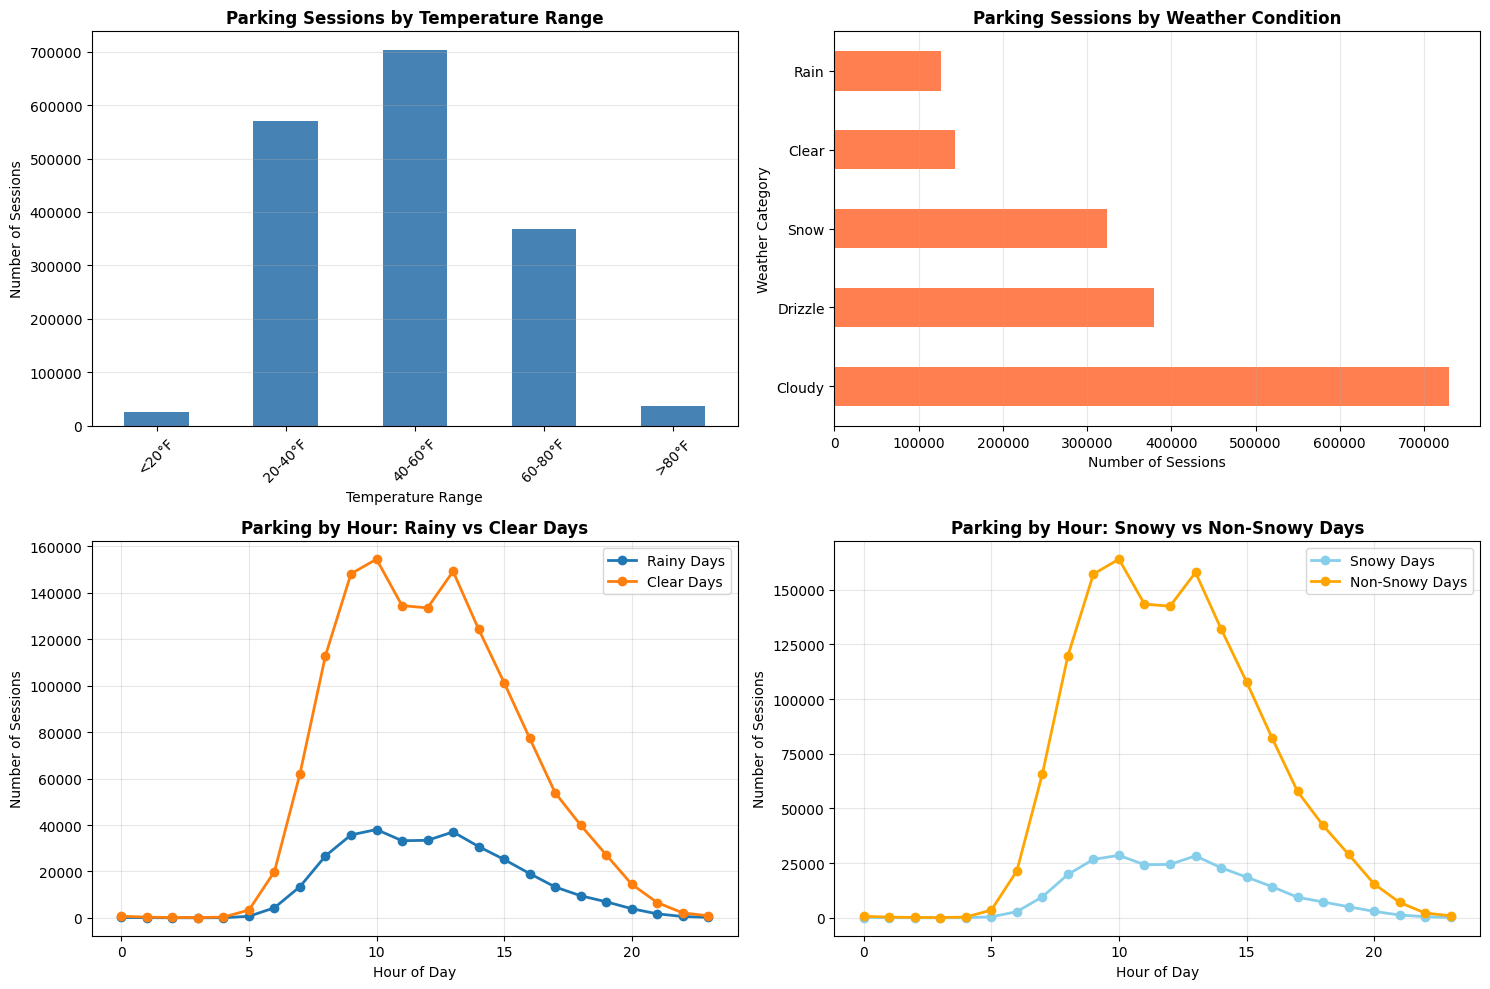

Visualization saved: data/processed/weather_impact_visualization.png


In [9]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Parking by temperature
temp_bins = [-20, 20, 40, 60, 80, 100]
temp_labels = ['<20°F', '20-40°F', '40-60°F', '60-80°F', '>80°F']
amp_weather['temp_bin'] = pd.cut(amp_weather['temp_mean_f'], bins=temp_bins, labels=temp_labels)
temp_counts = amp_weather.groupby('temp_bin').size()
temp_counts.plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Parking Sessions by Temperature Range', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Temperature Range')
axes[0, 0].set_ylabel('Number of Sessions')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# 2. Parking by weather category
weather_counts.plot(kind='barh', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Parking Sessions by Weather Condition', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Sessions')
axes[0, 1].set_ylabel('Weather Category')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# 3. Hourly parking on rainy vs clear days
rainy_hourly = amp_weather[amp_weather['is_rainy'] == 1].groupby('hour').size()
clear_hourly = amp_weather[amp_weather['is_rainy'] == 0].groupby('hour').size()
axes[1, 0].plot(rainy_hourly.index, rainy_hourly.values, marker='o', label='Rainy Days', linewidth=2)
axes[1, 0].plot(clear_hourly.index, clear_hourly.values, marker='o', label='Clear Days', linewidth=2)
axes[1, 0].set_title('Parking by Hour: Rainy vs Clear Days', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Number of Sessions')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Hourly parking on snowy vs non-snowy days
snowy_hourly = amp_weather[amp_weather['is_snowy'] == 1].groupby('hour').size()
not_snowy_hourly = amp_weather[amp_weather['is_snowy'] == 0].groupby('hour').size()
axes[1, 1].plot(snowy_hourly.index, snowy_hourly.values, marker='o', label='Snowy Days', linewidth=2, color='skyblue')
axes[1, 1].plot(not_snowy_hourly.index, not_snowy_hourly.values, marker='o', label='Non-Snowy Days', linewidth=2, color='orange')
axes[1, 1].set_title('Parking by Hour: Snowy vs Non-Snowy Days', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Sessions')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/weather_impact_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved: data/processed/weather_impact_visualization.png")

## Save Final Enriched Datasets

In [11]:
# Drop temporary columns if they exist
if 'temp_bin' in amp_weather.columns:
    amp_weather.drop('temp_bin', axis=1, inplace=True)

# Save AMP final dataset
print("Saving final enriched datasets...")
amp_weather.to_csv('../data/processed/amp_final.csv', index=False)
print(f"✓ Saved: data/processed/amp_final.csv ({len(amp_weather):,} records)")

# Save LPR final dataset
lpr_weather.to_csv('../data/processed/lpr_final.csv', index=False)
print(f"✓ Saved: data/processed/lpr_final.csv ({len(lpr_weather):,} records)")

print(f"\n" + "="*70)
print("MODELING-READY DATASETS COMPLETE!")
print("="*70)

print(f"\nYou now have two comprehensive datasets with:")
print(f"  ✓ Temporal features (hour, day, month, semester)")
print(f"  ✓ Calendar features (games, finals, breaks, holidays)")
print(f"  ✓ Weather features (temp, precipitation, snow, wind)")
print(f"  ✓ Location features (zones, lots)")

print(f"\nTotal features: ~{len(amp_weather.columns)} columns")
print(f"Total records: {len(amp_weather) + len(lpr_weather):,}")



Saving final enriched datasets...
✓ Saved: data/processed/amp_final.csv (1,702,867 records)
✓ Saved: data/processed/lpr_final.csv (1,810,155 records)

MODELING-READY DATASETS COMPLETE!

You now have two comprehensive datasets with:
  ✓ Temporal features (hour, day, month, semester)
  ✓ Calendar features (games, finals, breaks, holidays)
  ✓ Weather features (temp, precipitation, snow, wind)
  ✓ Location features (zones, lots)

Total features: ~41 columns
Total records: 3,513,022
